In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The dataset imported is "heart.csv" which can be done by .read_csv() function

In [ ]:
data = pd.read_csv('/content/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


.head() function returns the top 5 entries with maximum value which is tresbps column found in the dataset

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


.nunique() function returns the unique columns in the dataset



In [ ]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

.describe() function is used to calculate many of the data like mean, count, std

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Check for null values

In [ ]:
data.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
target      0
cp_0        0
cp_1        0
cp_2        0
cp_3        0
thal_0      0
thal_1      0
thal_2      0
thal_3      0
slope_0     0
slope_1     0
slope_2     0
dtype: int64

target.value_counts() function returns the count of unique objects in the dataset provided

In [ ]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Visualizing data using Seaborn

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

Prepare Data

In [ ]:
data_rev = data.copy()

def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'

data_rev['sex'] = data_rev['sex'].apply(chng)

def chng2(prob):
    if prob == 0:
        return "Heart Disease"
    else:
        return "No Heart Disease"
        
data_rev['target'] = data_rev['target'].apply(chng2)

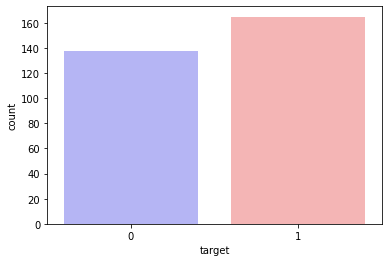

In [ ]:
sns.countplot(x = "target", data = data, palette = "bwr")
plt.show() 

Remove the entries with duplicates

In [ ]:
data = data.drop_duplicates()
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 22)


Print the percentage value of the people found with and without heart disease in the given dataset

In [ ]:
print("Percentage of people who don't have heart disease: {:.2f}%".format((len(data[data.target == 0]) / (len(data.target))*100)))
print("Percentage of people who have heart disease: {:.2f}%".format((len(data[data.target == 1]) / (len(data.target))*100)))

Percentage of people who don't have heart disease: 45.54%
Percentage of people who have heart disease: 54.46%


sns.countplot() defines the number of observations in each of the category using the bar chart

Print the number of Male and Female patients who have heart disease

In [ ]:
print("Percentage of Female Patients: {:.2f}%".format((len(data[data.sex == 0]) / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((len(data[data.sex == 1]) / (len(data.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


.groupby() function defines the data into specified group on some criteria

In [ ]:
data.groupby('target').mean()

Representation of the above methods (Age, Percentage of people with heart disease and the Frequency)

Text(0, 0.5, 'Frequency')

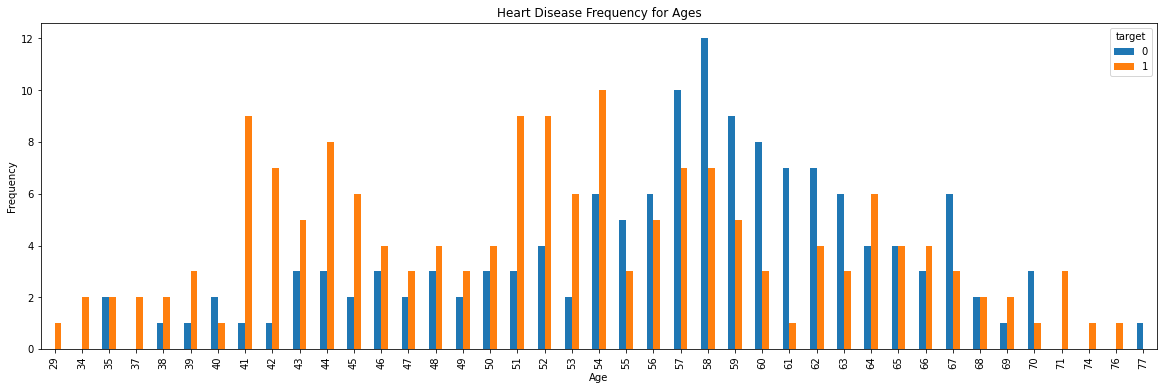

In [ ]:
pd.crosstab(data.age, data.target).plot(kind="bar", figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Maximum Heart Rate')

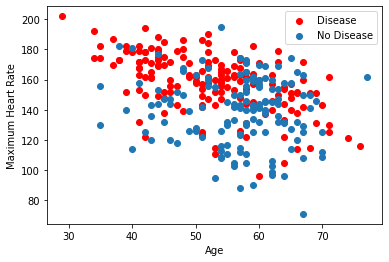

In [ ]:
plt.scatter(x = data.age[data.target==1], y = data.thalach[(data.target==1)], c="red")
plt.scatter(x = data.age[data.target==0], y = data.thalach[(data.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")

Create dummy values instead of "cp", "slope" and "thal" which are categorical values

In [ ]:
x = pd.get_dummies(data['cp'], prefix = "cp")
y = pd.get_dummies(data['thal'], prefix = "thal")
z = pd.get_dummies(data['slope'], prefix = "slope")

frames = [data, x, y, z]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


Drop the columns that have been made to dummy values

In [ ]:
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


Creating Logistic Regression Model

In [ ]:
x = data.target.values
x_data = data.drop(['target'], axis = 1)
x
x_data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,1,0,0,0,0,0,0,1,0,1,0
299,45,1,110,264,0,1,132,0,1.2,0,0,0,0,1,0,0,0,1,0,1,0
300,68,1,144,193,1,1,141,0,3.4,2,1,0,0,0,0,0,0,1,0,1,0
301,57,1,130,131,0,1,115,1,1.2,1,1,0,0,0,0,0,0,1,0,1,0


Change the name of the column

In [ ]:
data.column = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']
data.column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


['age',
 'sex',
 'chest_pain_type',
 'resting_blood_pressure',
 'cholesterol',
 'fasting_blood_sugar',
 'rest_ecg_type',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'st_depression',
 'st_slope_type',
 'num_major_vessels',
 'thalassemia_type',
 'target']

Analysis of the Algorithm

In [ ]:
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

Defining a sigmoid function 

In [ ]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

Define a function logistic_regression() to test the accuracy of the model

In [ ]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

Remove the outliers using IQR

In [ ]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print(q3-q1)
data_rem = data[~((data<(q1-1.5*(q3-q1))))|(data>(q3+1.5*(q3-q1))).any(axis=1)]
data_rem.shape

age         13.00
sex          1.00
trestbps    20.00
chol        63.75
fbs          0.00
restecg      1.00
thalach     32.75
exang        1.00
oldpeak      1.60
ca           1.00
target       1.00
cp_0         1.00
cp_1         0.00
cp_2         1.00
cp_3         0.00
thal_0       0.00
thal_1       0.00
thal_2       1.00
thal_3       1.00
slope_0      0.00
slope_1      1.00
slope_2      1.00
dtype: float64


(302, 22)

Assume or Gather column

In [ ]:
result = pd.concat(frames,axis=1)
x = result.drop('target', axis = 1)
y = result['target']

Split Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Fit into the model

In [ ]:
logre = LogisticRegression()
logre.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Predict the model which is around 86.88%

In [ ]:
y_pred = logre.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8688524590163934
